# Operations on Dataframes

* Author: Johannes Maucher
* Last Update: 2017-03-15
* References:
    * R in Action, Chapter 4
* Topics of this notebook
    * attach, remove and modify data in R dataframes
    * sort, merge and filter dataframes
    * find cells with missing values

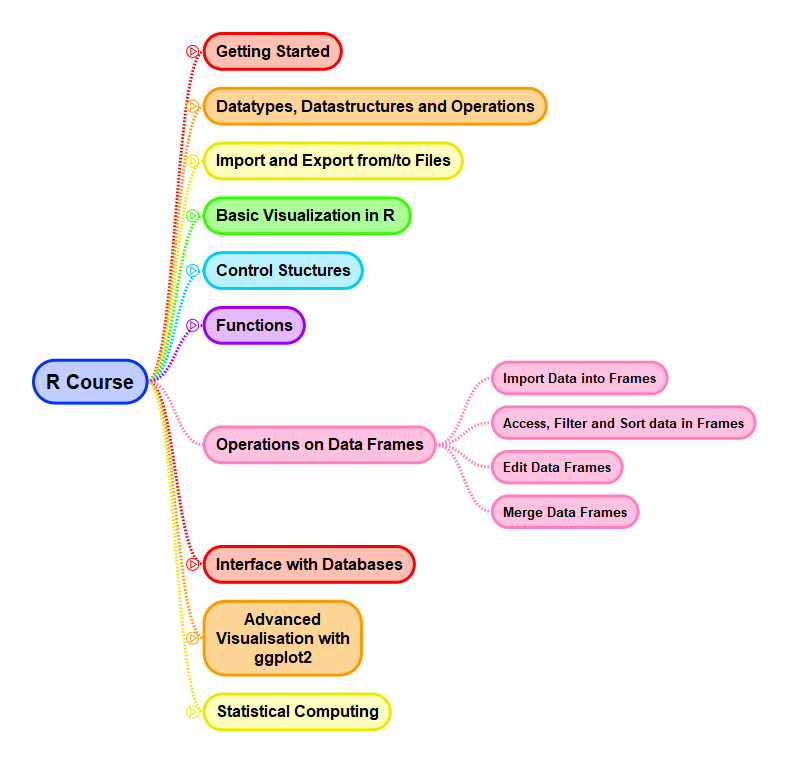

In [1]:
library("IRdisplay")
display_png(file="../../../Pics/DSRoperations.PNG",width=900) 

## Import Example Datasets
### Boston Housing Data
Example Data: Boston housing dataset [http://archive.ics.uci.edu/ml/datasets/Housing](http://archive.ics.uci.edu/ml/datasets/Housing).

This dataset is described in [https://www.law.berkeley.edu/files/Hedonic.PDF](https://www.law.berkeley.edu/files/Hedonic.PDF).

In [1]:
colnames=c("CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV")
housingData=read.csv(file="../data/housingModified.data", header=FALSE,sep=",",col.names=colnames)
#housingData=read.csv(file="../data/housing.data", header=FALSE,sep="",col.names=colnames)

In [2]:
class(housingData)
dim(housingData)
print(housingData)

[1] "data.frame"

[1] 16 14

      CRIM   ZN INDUS CHAS   NOX    RM   AGE    DIS RAD TAX PTRATIO      B
1  0.00632 18.0  2.31    0 0.538 6.575  65.2 4.0900   1 296    15.3 396.90
2  0.02731   NA  7.07    0 0.469 6.421  78.9 4.9671   2 242    17.8 396.90
3  0.02729  0.0  7.07    0 0.469    NA  61.1 4.9671   2 242    17.8 392.83
4  0.03237  0.0  2.18    0 0.458 6.998  45.8 6.0622   3 222    18.7 394.63
5  0.06905  0.0  2.18    0 0.458 7.147  54.2 6.0622   3 222    18.7 396.90
6  0.02985  0.0  2.18    0 0.458 6.430  58.7 6.0622   3 222    18.7 394.12
7  0.08829 12.5  7.87    0 0.524 6.012  66.6 5.5605   5 311    15.2 395.60
8  0.14455 12.5  7.87    0 0.524 6.172  96.1 5.9505   5 311    15.2 396.90
9  0.21124 12.5  7.87    0 0.524 5.631 100.0 6.0821   5 311    15.2 386.63
10 0.17004 12.5  7.87    0 0.524 6.004  85.9 6.5921   5 311    15.2 386.71
11 0.22489 12.5  7.87    0 0.524 6.377  94.3 6.3467   5 311    15.2 392.52
12 0.11747 12.5  7.87    0 0.524 6.009  82.9 6.2267   5 311    15.2 396.90
13 0.09378 12.5  7.87    

### HRV Data

In [4]:
hrvData=read.csv(file="../data/spikeeHRVjm.csv", header=TRUE,sep=";",dec=",",stringsAsFactors=FALSE)
dim(hrvData)
head(hrvData)
#tail(hrvData)

[1] 740  15

ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total
1,17.03.17,06:08:55,0:08:57,42.61727,130.33,116.80,58.42,1117,1407.88,1758,4537.05,1786.91,2.54,6489.09
2,16.03.17,06:09:06,0:09:59,44.02571,126.81,148.24,70.94,979,1362.84,1755,5277.45,3067.23,1.72,8999.88
3,15.03.17,06:10:05,0:10:00,41.56161,172.43,150.37,81.16,1018,1443.64,1805,7591.26,7359.64,1.03,15269.42
4,14.03.17,06:10:08,0:10:00,42.94211,170.64,191.75,76.64,1025,1397.23,1974,5687.76,8554.06,0.66,14614.74
5,13.03.17,06:25:49,0:10:00,42.98795,139.66,165.57,76.17,1012,1395.74,1742,4188.03,4258.05,0.98,8746.70
6,12.03.17,07:02:51,0:09:10,43.66749,136.07,174.51,68.59,924,1374.02,1832,3868.90,6005.90,0.64,9815.63


In [6]:
summary(hrvData)

       ID            Tag               Start              Dauer          
 Min.   :  1.0   Length:740         Length:740         Length:740        
 1st Qu.:187.2   Class :character   Class :character   Class :character  
 Median :371.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :371.2                                                           
 3rd Qu.:555.8                                                           
 Max.   :740.0                                                           
 NA's   :2                                                               
    Avg..HR          RMSSD             SDNN            pNN50      
 Min.   :39.29   Min.   : 40.65   Min.   : 60.87   Min.   :18.73  
 1st Qu.:43.52   1st Qu.:102.70   1st Qu.:123.32   1st Qu.:61.84  
 Median :45.86   Median :118.42   Median :139.51   Median :68.86  
 Mean   :45.99   Mean   :117.90   Mean   :140.02   Mean   :66.79  
 3rd Qu.:48.00   3rd Qu.:133.35   3rd Qu.:155.40   3rd Qu.:73.53  
 Max. 

Remove all rows with NA entries.

## Working with missing values

In R missing values are represented by the symbol `NA` (not available). For checking if a datastructure contains missing values the `is.na()`-function can be applied. It returns `TRUE` in all fields, where data is missing, otherwise false.

In [7]:
age <- c(12,NA,34,27)
gender  <- c('m','m','f',NA)
persons <- data.frame("age"=age,"gender"=gender)
persons

age,gender
12,m
NA,m
34,f
27,NA


In [8]:
anyNA(persons)
is.na(persons)

[1] TRUE

age,gender
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


It is not possible to compare the *NA*-symbol to the value of other variables. E.g. the logical test `hrvData$ID == NA` is never true. In addition to `NA`, there are two other symbols for extraordinary values in R:

* `Inf` and `-Inf` are the symbols for positive and negative infinity, e.g. `1/0`
* `NaN` is the symbol for impossible values e.g. `asin(2)`.

The presence of infinite or impossible values can be checked by the `is.infinite()` and the `is.nan()` - function. 

In [10]:
1/0
is.infinite(-3/0)
asin(2)
is.nan(asin(2))

[1] Inf

[1] TRUE

Warning message in asin(2):
"NaNs wurden erzeugt"

[1] NaN

Warning message in asin(2):
"NaNs wurden erzeugt"

[1] TRUE

All rows of a dataframe, which contain missing values can be removed by the `omit()`-function:

In [12]:
na.omit(persons)

,age,gender
1,12,m
3,34,f


Remove all rows in dataframe *hrvData*, which contain a missing value:

In [9]:
#hrvData <- hrvData[complete.cases(hrvData),]
hrvData <- na.omit(hrvData)
dim(hrvData)
hrvData

[1] 738  15

,ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total
1,1,17.03.17,06:08:55,0:08:57,42.61727,130.33,116.80,58.42,1117,1407.88,1758,4537.05,1786.91,2.54,6489.09
2,2,16.03.17,06:09:06,0:09:59,44.02571,126.81,148.24,70.94,979,1362.84,1755,5277.45,3067.23,1.72,8999.88
3,3,15.03.17,06:10:05,0:10:00,41.56161,172.43,150.37,81.16,1018,1443.64,1805,7591.26,7359.64,1.03,15269.42
4,4,14.03.17,06:10:08,0:10:00,42.94211,170.64,191.75,76.64,1025,1397.23,1974,5687.76,8554.06,0.66,14614.74
5,5,13.03.17,06:25:49,0:10:00,42.98795,139.66,165.57,76.17,1012,1395.74,1742,4188.03,4258.05,0.98,8746.70
6,6,12.03.17,07:02:51,0:09:10,43.66749,136.07,174.51,68.59,924,1374.02,1832,3868.90,6005.90,0.64,9815.63
7,7,11.03.17,07:18:35,0:10:00,52.59098,87.90,144.11,43.30,833,1140.88,1610,3321.07,1919.35,1.73,5429.36
8,8,10.03.17,06:09:35,0:08:03,45.56397,131.17,136.42,74.93,1016,1316.83,1707,3568.70,5131.23,0.70,9418.67
9,9,09.03.17,06:08:14,0:08:08,46.89918,129.88,123.51,73.35,1009,1279.34,1712,1566.03,4754.87,0.33,6479.18
10,10,08.03.17,06:08:40,0:10:00,47.21695,111.50,112.73,68.80,996,1270.73,1765,2786.72,3383.95,0.82,6371.16


Functions, which are applied on data with missing values, return `NA`, as shown in the following two lines:

In [10]:
sum(age)
mean(age)

[1] NA

[1] NA

However, nearly all numeric functions have the parameter `na.rm`. If this parameter is set to `TRUE`, all `NA`-elements are ignored in calculating the function, e.g.

In [10]:
sum(age,na.rm=TRUE)
mean(age,na.rm=TRUE)

[1] 73

[1] 24.33333

## Types and type conversion
### Determine type of variables

In [12]:
class(hrvData)

[1] "data.frame"

In order to check for a specific variable-type and to convert into a variable type the following functions can be applied:

|      Check      |     Convert     |
|:---------------:|:---------------:|
| is.numeric()    | as.numeric()    |
| is.character()  | as.character()  |
| is.vector()     | as.vector()     |
| is.matrix()     | as.matrix()     |
| is.data.frame() | as.data.frame() |
| is.factor()     | as.factor()     |
| is.logical()    | as.logical()    |

In [13]:
is.data.frame(hrvData)
is.numeric(hrvData$RMSSD)
is.vector(hrvData$RMSSD)
is.numeric(hrvData$Tag)

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

In [14]:
names(hrvData)
rownames(hrvData) <- hrvData$ID
sapply(hrvData,mode)

[1] "ID"      "Tag"     "Start"   "Dauer"   "Avg..HR" "RMSSD"   "SDNN"   
 [8] "pNN50"   "RRmin"   "RRmean"  "RRmax"   "LF"      "HF"      "LF.HF"  
[15] "Total"

ID         Tag       Start       Dauer     Avg..HR       RMSSD 
  "numeric" "character" "character" "character"   "numeric"   "numeric" 
       SDNN       pNN50       RRmin      RRmean       RRmax          LF 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
         HF       LF.HF       Total 
  "numeric"   "numeric"   "numeric"

### Date objects

In R dates are typically entered as character strings. In this format no calculations can be performed on them. However, the string representation can be transformed into a numeric *Date*-representation by the function *as.Date(datestring,format)*. Here, datestring is the string representation of the date, and format specifies the format of the date in this string-representation. 

| Symbol | Meaning                        | Examples      |
|--------|--------------------------------|---------------|
| %d     | Day as number between 0 and 31 | 7,07,28       |
| %a %A  | Weekday - abbreviated or not   | Mon, Monday   |
| %m     | Month between 0 and 12         | 2,05,11       |
| %b %B  | Month - abbreviated or not     | Feb, February |
| %y %Y  | Year_ two-digit or four-digit  | 09, 2009      |

In [11]:
date1 <- c("5-03-2017")
class(date1)
date1num <- as.Date(date1,"%d-%m-%Y")
class(date1num)
print(date1num)
date2  <- c("17-Jun-23")
date2num  <- as.Date(date2,"%y-%b-%d")
class(date2num)
print(date2num)

[1] "character"

[1] "Date"

[1] "2017-03-05"


[1] "Date"

[1] "2017-06-23"


Determine current date and transformation from *Date*-object to character-string.

In [12]:
now <- Sys.Date()
print(now)
class(now)
nowStr=format(now,"%d.%B %Y")
print(nowStr)
class(nowStr)
weekDay=format(now,"%A")
print(weekDay)

[1] "2017-09-20"


[1] "Date"

[1] "20.September 2017"


[1] "character"

[1] "Mittwoch"


Internally, R saves *Date*-objects as numbers of days since *01.01.1970*, with negative values for earlier days. This implies that arithmetic operations such as subtraction can be applied on them:

In [17]:
datediff <- date2num-date1num
datediff

Time difference of 110 days

If the time-difference shall be calculated in other units than days, the *difftime()*-function can be applied as follows:

In [18]:
difftime(date2num,date1num,units="weeks")

Time difference of 15.71429 weeks

In [19]:
sapply(hrvData,mode)
hrvData$Tag <- as.Date(hrvData$Tag,"%d.%m.%y")
head(hrvData)
sapply(hrvData,mode)

ID         Tag       Start       Dauer     Avg..HR       RMSSD 
  "numeric" "character" "character" "character"   "numeric"   "numeric" 
       SDNN       pNN50       RRmin      RRmean       RRmax          LF 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
         HF       LF.HF       Total 
  "numeric"   "numeric"   "numeric"

ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total
1,2017-03-17,06:08:55,0:08:57,42.61727,130.33,116.80,58.42,1117,1407.88,1758,4537.05,1786.91,2.54,6489.09
2,2017-03-16,06:09:06,0:09:59,44.02571,126.81,148.24,70.94,979,1362.84,1755,5277.45,3067.23,1.72,8999.88
3,2017-03-15,06:10:05,0:10:00,41.56161,172.43,150.37,81.16,1018,1443.64,1805,7591.26,7359.64,1.03,15269.42
4,2017-03-14,06:10:08,0:10:00,42.94211,170.64,191.75,76.64,1025,1397.23,1974,5687.76,8554.06,0.66,14614.74
5,2017-03-13,06:25:49,0:10:00,42.98795,139.66,165.57,76.17,1012,1395.74,1742,4188.03,4258.05,0.98,8746.70
6,2017-03-12,07:02:51,0:09:10,43.66749,136.07,174.51,68.59,924,1374.02,1832,3868.90,6005.90,0.64,9815.63


ID         Tag       Start       Dauer     Avg..HR       RMSSD 
  "numeric"   "numeric" "character" "character"   "numeric"   "numeric" 
       SDNN       pNN50       RRmin      RRmean       RRmax          LF 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
         HF       LF.HF       Total 
  "numeric"   "numeric"   "numeric"

## Add/Remove data to/from dataframe
### Add rows

In [20]:
newEntry <- list(1,as.Date(c("18.03.17"),format="%d.%m.%y"),"06:10:05","0:09:05",43.4,142,123,61,1200,1520,1670,3894,2786,2.3,6906)
sapply(newEntry,mode)
length(newEntry)

[1] "numeric"   "numeric"   "character" "character" "numeric"   "numeric"  
 [7] "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"  
[13] "numeric"   "numeric"   "numeric"

[1] 15

In [21]:
hrvData$ID=hrvData$ID+1

In [22]:
head(hrvData)

ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total
2,2017-03-17,06:08:55,0:08:57,42.61727,130.33,116.80,58.42,1117,1407.88,1758,4537.05,1786.91,2.54,6489.09
3,2017-03-16,06:09:06,0:09:59,44.02571,126.81,148.24,70.94,979,1362.84,1755,5277.45,3067.23,1.72,8999.88
4,2017-03-15,06:10:05,0:10:00,41.56161,172.43,150.37,81.16,1018,1443.64,1805,7591.26,7359.64,1.03,15269.42
5,2017-03-14,06:10:08,0:10:00,42.94211,170.64,191.75,76.64,1025,1397.23,1974,5687.76,8554.06,0.66,14614.74
6,2017-03-13,06:25:49,0:10:00,42.98795,139.66,165.57,76.17,1012,1395.74,1742,4188.03,4258.05,0.98,8746.70
7,2017-03-12,07:02:51,0:09:10,43.66749,136.07,174.51,68.59,924,1374.02,1832,3868.90,6005.90,0.64,9815.63


In [23]:
hrvData <- rbind(hrvData,newEntry)

In [24]:
tail(hrvData)

,ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total
736,737,2015-02-27,05:47:55,0:10:33.921000,44.97313,123.37,141.73,71.43,949,1334.13,1679,1675.04,4225.11,0.40,6203.20
737,738,2015-02-26,05:23:53,0:12:11.591000,42.61031,150.28,150.45,79.57,1030,1408.11,1858,1550.89,5281.51,0.29,7094.40
738,739,2015-02-25,05:45:59,0:11:20.961000,42.58460,121.18,135.21,73.71,1107,1408.96,1806,1545.52,4068.66,0.38,5961.24
739,740,2015-02-23,07:36:30,0:12:12.876000,51.98091,72.18,73.20,55.10,944,1154.27,1436,1320.89,1068.71,1.24,2525.71
740,741,2015-02-17,10:32:27,0:23:55.177000,53.93258,67.88,144.77,40.60,635,1112.50,1542,4877.74,1303.45,3.74,7027.42
7391,1,2017-03-18,06:10:05,0:09:05,43.40000,142.00,123.00,61.00,1200,1520.00,1670,3894.00,2786.00,2.30,6906.00


The *rbind()*-function can also be applied for a vertical concatenation of dataframes: *rbind(df1,df2)*. This concatenation requires that the two dataframes have the same variables (columnnames).

In [25]:
rownames(hrvData) <- hrvData$ID
head(hrvData)

,ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total
2,2,2017-03-17,06:08:55,0:08:57,42.61727,130.33,116.80,58.42,1117,1407.88,1758,4537.05,1786.91,2.54,6489.09
3,3,2017-03-16,06:09:06,0:09:59,44.02571,126.81,148.24,70.94,979,1362.84,1755,5277.45,3067.23,1.72,8999.88
4,4,2017-03-15,06:10:05,0:10:00,41.56161,172.43,150.37,81.16,1018,1443.64,1805,7591.26,7359.64,1.03,15269.42
5,5,2017-03-14,06:10:08,0:10:00,42.94211,170.64,191.75,76.64,1025,1397.23,1974,5687.76,8554.06,0.66,14614.74
6,6,2017-03-13,06:25:49,0:10:00,42.98795,139.66,165.57,76.17,1012,1395.74,1742,4188.03,4258.05,0.98,8746.70
7,7,2017-03-12,07:02:51,0:09:10,43.66749,136.07,174.51,68.59,924,1374.02,1832,3868.90,6005.90,0.64,9815.63


### Add columns
New columns are the result of elementwise arithmetic operations on existing columns: 

In [26]:
hrvData$NormRMSSD <- hrvData$RMSSD/hrvData$RRmean
hrvData$LnRMSSD <- log(hrvData$RMSSD)
head(hrvData)

,ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total,NormRMSSD,LnRMSSD
2,2,2017-03-17,06:08:55,0:08:57,42.61727,130.33,116.80,58.42,1117,1407.88,1758,4537.05,1786.91,2.54,6489.09,0.09257181,4.870070
3,3,2017-03-16,06:09:06,0:09:59,44.02571,126.81,148.24,70.94,979,1362.84,1755,5277.45,3067.23,1.72,8999.88,0.09304834,4.842690
4,4,2017-03-15,06:10:05,0:10:00,41.56161,172.43,150.37,81.16,1018,1443.64,1805,7591.26,7359.64,1.03,15269.42,0.11944113,5.149991
5,5,2017-03-14,06:10:08,0:10:00,42.94211,170.64,191.75,76.64,1025,1397.23,1974,5687.76,8554.06,0.66,14614.74,0.12212735,5.139556
6,6,2017-03-13,06:25:49,0:10:00,42.98795,139.66,165.57,76.17,1012,1395.74,1742,4188.03,4258.05,0.98,8746.70,0.10006162,4.939211
7,7,2017-03-12,07:02:51,0:09:10,43.66749,136.07,174.51,68.59,924,1374.02,1832,3868.90,6005.90,0.64,9815.63,0.09903058,4.913169


New column is a discretization of an existing column.

In [27]:
hrvData  <-  within(hrvData,{                   #within-functions allows, that within the curly brackets, the name of the dataframe is not required.
    HRcat  <- NA
    HRcat[Avg..HR < 43]  <- "Low"
    HRcat[Avg..HR >=43 & Avg..HR < 48]  <- "Med"
    HRcat[Avg..HR >=48]  <- "High"
})

The columns of one dataframe *df2* can be attached to the columns of another dataframe *df1* by applying the *rbind(df1,df2)*-function. This concatenation requires that the two dataframes have the same number of rows and are sorted in the same order.

## Transpose Dataframe

In [42]:
head(hrvData)
hrvDataT<-t(hrvData)
head(hrvDataT)

ID,Tag,Start,Dauer,AvgHR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total,NormRMSSD,LnRMSSD,HRcat
1,2017-03-18,06:10:05,0:09:05,43.40000,142.00,123.00,61.00,1200,1520.00,1670,3894.00,2786.00,2.30,6906.00,0.09342105,4.955827,Med
2,2017-03-17,06:08:55,0:08:57,42.61727,130.33,116.80,58.42,1117,1407.88,1758,4537.05,1786.91,2.54,6489.09,0.09257181,4.870070,Low
3,2017-03-16,06:09:06,0:09:59,44.02571,126.81,148.24,70.94,979,1362.84,1755,5277.45,3067.23,1.72,8999.88,0.09304834,4.842690,Med
4,2017-03-15,06:10:05,0:10:00,41.56161,172.43,150.37,81.16,1018,1443.64,1805,7591.26,7359.64,1.03,15269.42,0.11944113,5.149991,Low
5,2017-03-14,06:10:08,0:10:00,42.94211,170.64,191.75,76.64,1025,1397.23,1974,5687.76,8554.06,0.66,14614.74,0.12212735,5.139556,Low
6,2017-03-13,06:25:49,0:10:00,42.98795,139.66,165.57,76.17,1012,1395.74,1742,4188.03,4258.05,0.98,8746.70,0.10006162,4.939211,Low


,1,2,3,4,5,6,7,8,9,10,...,732,733,734,735,736,737,738,739,740,741
ID,1,2,3,4,5,6,7,8,9,10,...,732,733,734,735,736,737,738,739,740,741
Tag,2017-03-18,2017-03-17,2017-03-16,2017-03-15,2017-03-14,2017-03-13,2017-03-12,2017-03-11,2017-03-10,2017-03-09,...,2015-03-04,2015-03-03,2015-03-02,2015-03-01,2015-02-28,2015-02-27,2015-02-26,2015-02-25,2015-02-23,2015-02-17
Start,06:10:05,06:08:55,06:09:06,06:10:05,06:10:08,06:25:49,07:02:51,07:18:35,06:09:35,06:08:14,...,05:37:31,05:49:08,05:48:25,06:02:26,06:07:51,05:47:55,05:23:53,05:45:59,07:36:30,10:32:27
Dauer,0:09:05,0:08:57,0:09:59,0:10:00,0:10:00,0:10:00,0:09:10,0:10:00,0:08:03,0:08:08,...,0:11:19.446000,0:11:15.186000,0:11:59.397000,0:11:46.702000,0:11:56.851000,0:10:33.921000,0:12:11.591000,0:11:20.961000,0:12:12.876000,0:23:55.177000
AvgHR,43.40000,42.61727,44.02571,41.56161,42.94211,42.98795,43.66749,52.59098,45.56397,46.89918,...,42.93504,41.17994,43.37862,44.51402,41.57197,44.97313,42.61031,42.58460,51.98091,53.93258
RMSSD,142.00,130.33,126.81,172.43,170.64,139.66,136.07,87.90,131.17,129.88,...,130.41,142.60,119.27,112.56,127.73,123.37,150.28,121.18,72.18,67.88


## Merge Dataframes
Dataframes can be joined by one or more key variables by applying the *merge()*-function. 

In [4]:
Id1 <- c(1,2,3,4)
age <- c(12,21,34,27)
gender  <- c('m','m','f','f')
persons <- data.frame("ID"=Id1,"AGE"=age,"GENDER"=gender)
persons
Id2 <- c(2,3,4,5)
names <- c("peter","mary","betty","ben")
personNames <- data.frame("ID"=Id2,"NAMES"=names)
personNames

ID,AGE,GENDER
1,12,m
2,21,m
3,34,f
4,27,f


ID,NAMES
2,peter
3,mary
4,betty
5,ben


The arguments `all`, `all.x` and `all.y` of the `merge(x,y,all,all.x,all.y,by)`- function can be set in order to configure the type of join: 
* Inner Join: `all=FALSE` (default)
* Outer Join: `all=TRUE`
* Left (outer) join: `all.x=TRUE`
* Right (outer) join: `all.y=TRUE`

The different joins are demonstrated in the following code-cells:

**Inner Join:**

In [11]:
NamedPersons <- merge(persons,personNames,by="ID")
NamedPersons

ID,AGE,GENDER,NAMES
2,21,m,peter
3,34,f,mary
4,27,f,betty


**Left (outer) join:**

In [12]:
NamedPersons <- merge(persons,personNames,by="ID",all.x=TRUE)
NamedPersons

ID,AGE,GENDER,NAMES
1,12,m,NA
2,21,m,peter
3,34,f,mary
4,27,f,betty


**Right (outer) join:**

In [13]:
NamedPersons <- merge(persons,personNames,by="ID",all.y=TRUE)
NamedPersons

ID,AGE,GENDER,NAMES
2,21,m,peter
3,34,f,mary
4,27,f,betty
5,NA,NA,ben


**Outer join:**

In [14]:
NamedPersons <- merge(persons,personNames,by="ID",all=TRUE)
NamedPersons

ID,AGE,GENDER,NAMES
1,12,m,NA
2,21,m,peter
3,34,f,mary
4,27,f,betty
5,NA,NA,ben


## Filter by value

Determine subset of rows, whose SDNN value is *>200*:

In [30]:
hrvData[hrvData$SDNN > 200,]

,ID,Tag,Start,Dauer,Avg..HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total,NormRMSSD,LnRMSSD,HRcat
89,89,2016-12-18,07:11:22,0:10:12.647000,51.37734,160.56,261.83,70.30,501,1167.83,1752,3122.79,5940.97,0.53,8990.28,0.13748576,5.078668,High
102,102,2016-12-05,06:09:33,0:08:22.945000,48.91211,164.04,294.51,73.54,507,1226.69,1803,6150.24,7670.06,0.80,14364.70,0.13372572,5.100110,High
110,110,2016-11-26,06:08:08,0:08:45,42.91324,189.50,203.06,79.62,917,1398.17,1918,9947.96,7348.01,1.35,17753.86,0.13553431,5.244389,Low
251,251,2016-07-04,06:25:15,0:10:40,43.82217,159.91,200.30,73.75,757,1369.17,1816,7968.60,5137.97,1.55,13799.12,0.11679339,5.074611,Med
282,282,2016-06-03,06:07:54,0:10:08,41.73332,164.00,200.93,72.99,714,1437.70,1869,6313.27,6230.76,1.01,13019.58,0.11407109,5.099866,Low
418,418,2016-01-19,05:40:36,0:10:01.174000,41.83721,175.76,201.30,77.29,938,1434.13,1890,3548.36,7353.37,0.48,11534.41,0.12255514,5.169119,Low
439,439,2015-12-29,06:49:47,0:10:23.349000,45.03321,139.17,204.34,67.99,921,1332.35,1855,7192.42,4404.31,1.63,12543.87,0.10445454,4.935696,Med
513,513,2015-10-16,06:20:27,0:10:32.282000,42.23865,131.31,200.13,70.34,894,1420.50,1901,6206.75,3811.00,1.63,10504.32,0.09243928,4.877561,Low
521,521,2015-10-08,06:34:11,0:11:02.328000,43.00736,143.55,200.05,71.46,982,1395.11,1850,7071.29,4413.60,1.60,12031.96,0.10289511,4.966683,Med
526,526,2015-10-02,06:18:29,0:08:46.148000,44.10792,134.20,239.08,71.94,763,1360.30,2190,13505.08,10288.69,1.31,25592.87,0.09865471,4.899331,Med


Clip all *Total*-values *>20000* to *20000*:

In [31]:
hrvData$Total[hrvData$Total>20000]  <- 20000

### Filter by date

In [32]:
startdate=as.Date("2016-01-01",format="%Y-%m-%d")
enddate=as.Date("2016-06-30",format="%Y-%m-%d")
hrvDataSub <- hrvData[hrvData$Tag > startdate & hrvData$Tag < enddate,]
dim(hrvDataSub)

[1] 180  18

Plot data of selected time-range. Here the plotly library is applied. 

### Filter by subset()-function

In [33]:
hrvData2 <- subset(hrvData,RMSSD > 200 | RMSSD < 50, select=c(Tag,RMSSD,SDNN,HF,LF))
hrvData2

,Tag,RMSSD,SDNN,HF,LF
146,2016-10-19,206.20,192.39,9388.70,4430.64
225,2016-07-31,40.65,61.06,78.56,1160.56
298,2016-05-18,44.62,60.87,697.73,662.81


## Rename column

In [34]:
names(hrvData)[5] <- "AvgHR"

## Sort Data
In R data can be sorted in various ways using the function *order()*. For example, the dataframe *hrvData* is not ordered after the addition of an additional row, as can be seen in the following display of the dataframe's tail: 

In [35]:
tail(hrvData)

,ID,Tag,Start,Dauer,AvgHR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total,NormRMSSD,LnRMSSD,HRcat
737,737,2015-02-27,05:47:55,0:10:33.921000,44.97313,123.37,141.73,71.43,949,1334.13,1679,1675.04,4225.11,0.40,6203.20,0.09247225,4.815188,Med
738,738,2015-02-26,05:23:53,0:12:11.591000,42.61031,150.28,150.45,79.57,1030,1408.11,1858,1550.89,5281.51,0.29,7094.40,0.10672462,5.012500,Low
739,739,2015-02-25,05:45:59,0:11:20.961000,42.58460,121.18,135.21,73.71,1107,1408.96,1806,1545.52,4068.66,0.38,5961.24,0.08600670,4.797277,Low
740,740,2015-02-23,07:36:30,0:12:12.876000,51.98091,72.18,73.20,55.10,944,1154.27,1436,1320.89,1068.71,1.24,2525.71,0.06253303,4.279163,High
741,741,2015-02-17,10:32:27,0:23:55.177000,53.93258,67.88,144.77,40.60,635,1112.50,1542,4877.74,1303.45,3.74,7027.42,0.06101573,4.217741,High
1,1,2017-03-18,06:10:05,0:09:05,43.40000,142.00,123.00,61.00,1200,1520.00,1670,3894.00,2786.00,2.30,6906.00,0.09342105,4.955827,Med


The following line shows how the unordered dataframe can be ordered according to increasing ID:

In [36]:
hrvData <- hrvData[order(hrvData$ID),]
tail(hrvData)

,ID,Tag,Start,Dauer,AvgHR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total,NormRMSSD,LnRMSSD,HRcat
736,736,2015-02-28,06:07:51,0:11:56.851000,41.57197,127.73,128.64,77.08,1142,1443.28,1819,1985.86,4545.80,0.44,6735.02,0.08849981,4.849919,Low
737,737,2015-02-27,05:47:55,0:10:33.921000,44.97313,123.37,141.73,71.43,949,1334.13,1679,1675.04,4225.11,0.40,6203.20,0.09247225,4.815188,Med
738,738,2015-02-26,05:23:53,0:12:11.591000,42.61031,150.28,150.45,79.57,1030,1408.11,1858,1550.89,5281.51,0.29,7094.40,0.10672462,5.012500,Low
739,739,2015-02-25,05:45:59,0:11:20.961000,42.58460,121.18,135.21,73.71,1107,1408.96,1806,1545.52,4068.66,0.38,5961.24,0.08600670,4.797277,Low
740,740,2015-02-23,07:36:30,0:12:12.876000,51.98091,72.18,73.20,55.10,944,1154.27,1436,1320.89,1068.71,1.24,2525.71,0.06253303,4.279163,High
741,741,2015-02-17,10:32:27,0:23:55.177000,53.93258,67.88,144.77,40.60,635,1112.50,1542,4877.74,1303.45,3.74,7027.42,0.06101573,4.217741,High


Sorting can even be applied with respect to more than one variable. E.g. *hrvData* can be sorted first according to the *HRcat* parameter and then according to *RMSSD*:

In [37]:
hrvDataByCat <- hrvData[order(hrvData$HRcat,hrvData$RMSSD),]
hrvDataByCat

,ID,Tag,Start,Dauer,AvgHR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total,NormRMSSD,LnRMSSD,HRcat
298,298,2016-05-18,06:32:02,0:10:04,55.88882,44.62,60.87,26.16,840,1073.56,1271,662.81,697.73,0.95,1410.80,0.04156265,3.798182,High
168,168,2016-09-26,06:10:41,0:10:27,59.87785,51.03,77.26,28.94,834,1002.04,1353,1676.53,1070.03,1.57,2992.24,0.05092611,3.932414,High
441,441,2015-12-27,07:33:06,0:07:23.169000,57.10044,57.23,110.66,34.79,830,1050.78,1365,2110.23,1025.70,2.06,3410.92,0.05446430,4.047078,High
68,68,2017-01-08,07:11:05,0:10:30,55.69996,57.76,83.82,37.97,851,1077.20,1314,1600.03,1260.15,1.27,3320.19,0.05362050,4.056296,High
532,532,2015-09-26,07:32:36,0:10:01.148000,54.59360,58.09,67.75,39.03,911,1099.03,1306,1535.18,907.22,1.69,2523.67,0.05285570,4.061994,High
107,107,2016-11-29,06:38:31,0:09:30,55.74136,58.95,98.51,34.80,866,1076.40,1384,802.18,791.40,1.01,1605.37,0.05476589,4.076690,High
218,218,2016-08-07,07:12:54,0:11:12.829000,54.05503,62.74,96.36,40.61,927,1109.98,1435,1671.69,1196.32,1.40,2978.13,0.05652354,4.138999,High
105,105,2016-12-01,06:13:19,0:10:01,54.65875,62.81,87.33,39.26,907,1097.72,1422,1711.66,917.10,1.87,2855.92,0.05721860,4.140114,High
539,539,2015-09-19,06:34:26,0:10:43.324000,50.50760,64.72,75.35,47.56,1000,1187.94,1439,1078.46,1252.75,0.86,2410.54,0.05448087,4.170070,High
54,54,2017-01-22,06:44:19,0:07:23,55.92268,65.20,104.85,41.08,843,1072.91,1373,1273.84,1204.24,1.06,2588.16,0.06076931,4.177459,High


## Aggregate Data
The term aggregation refers to the process of partitioning all rows of a dataframe, which have the same value in one or more configurable attributes, and summarize each partition by the value of a configurable function. In the example below all observations, which have the same value in the attribute *HRcat* are mapped to the same partition and the *mean()*-function is applied to all numeric attributes of each partition.  

In [51]:
summedByCat<-aggregate(hrvData[c(-3,-4,-18)],by=list(Group.HRcat=hrvData$HRcat),FUN=mean,na.rm=TRUE)
summedByCat

Group.HRcat,ID,Tag,AvgHR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF.HF,Total,NormRMSSD,LnRMSSD
High,286.4108,2016-05-30,50.44508,94.56605,125.8154,56.42476,887.600,1191.505,1609.368,2536.616,2808.714,0.9761081,5640.964,0.07903719,4.526766
Low,432.7415,2016-01-03,41.70997,134.92796,143.7063,73.60973,1068.646,1439.309,1825.959,3722.227,4339.489,1.0259864,8421.190,0.09378625,4.891973
Med,388.3292,2016-02-17,45.50224,122.41580,145.1121,69.02179,977.285,1320.167,1743.663,3164.137,4092.694,0.8319902,7596.902,0.09264467,4.795607


## Visualization

In [38]:
dim(hrvData)
subseq <- seq(1,dim(hrvData)[1],100)
print(subseq)
parts <- length(subseq)

[1] 739  18

[1]   1 101 201 301 401 501 601 701


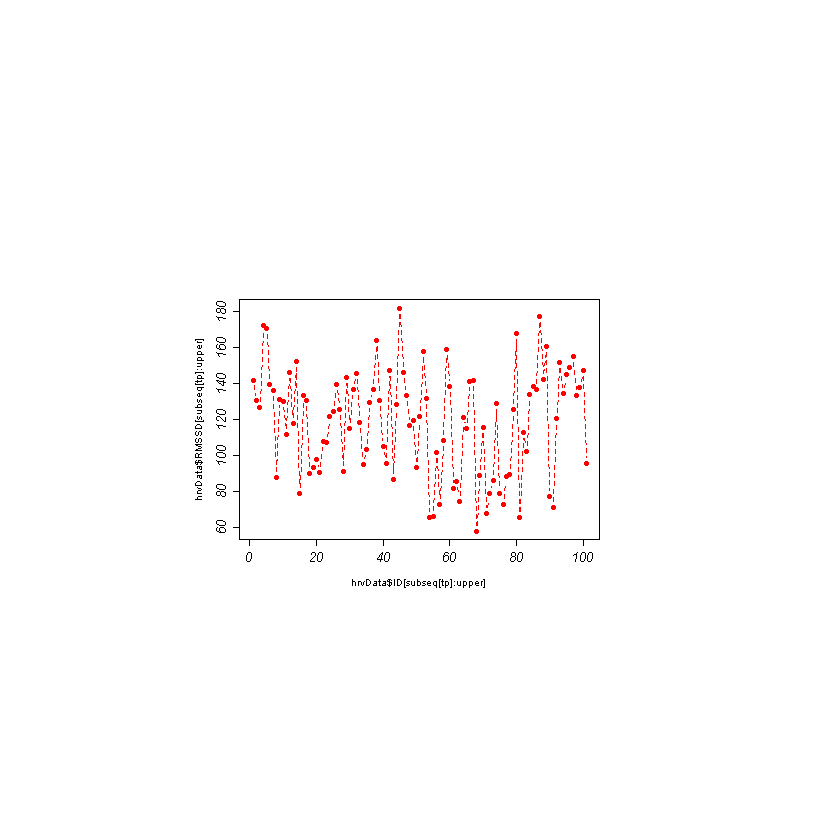

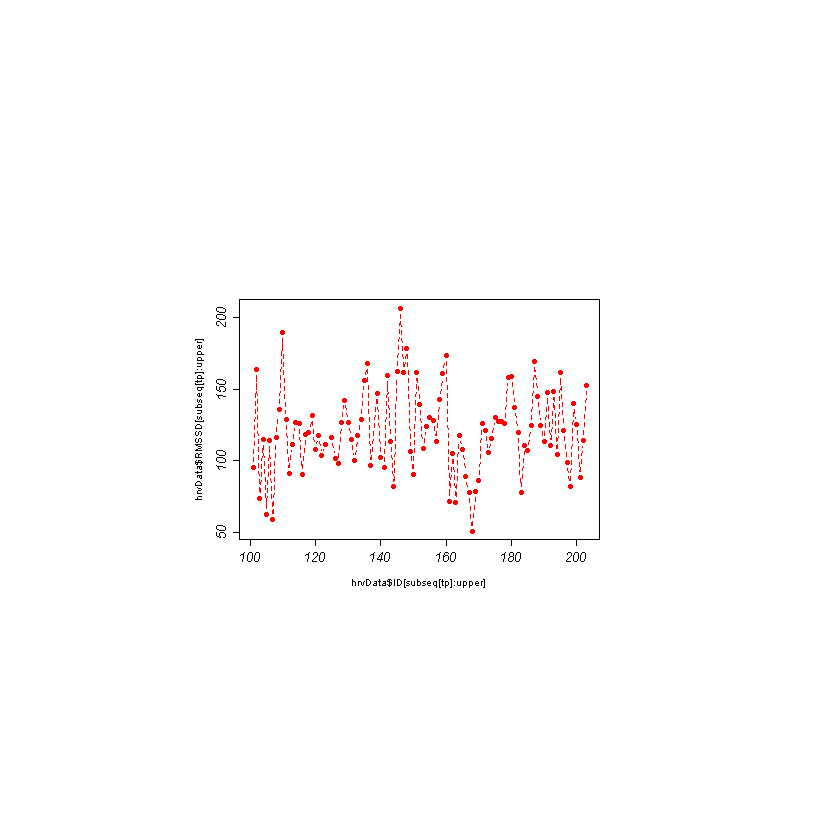

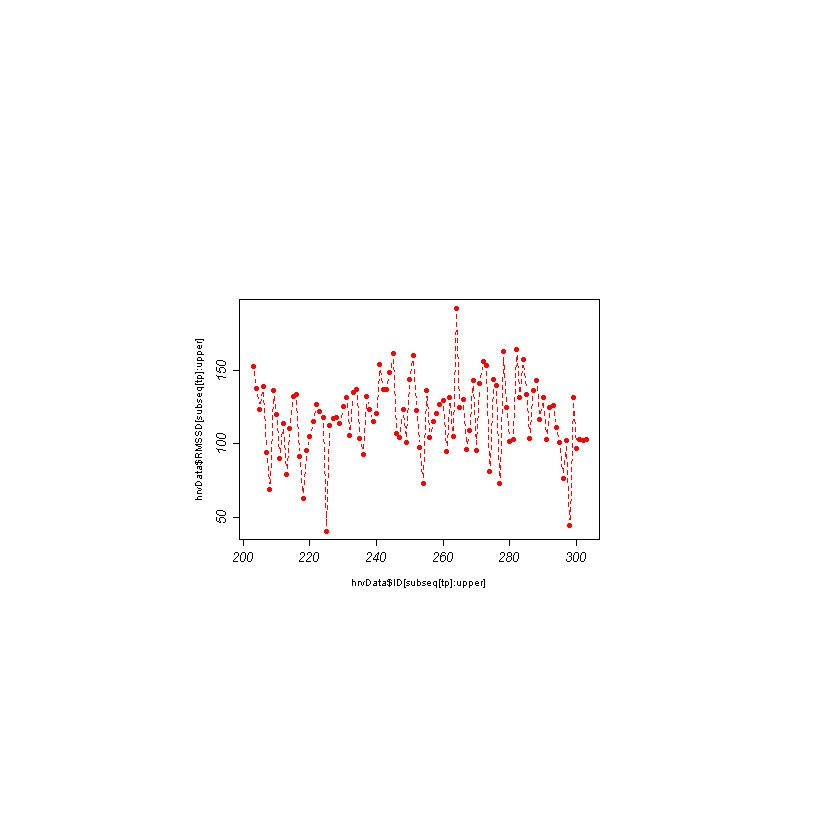

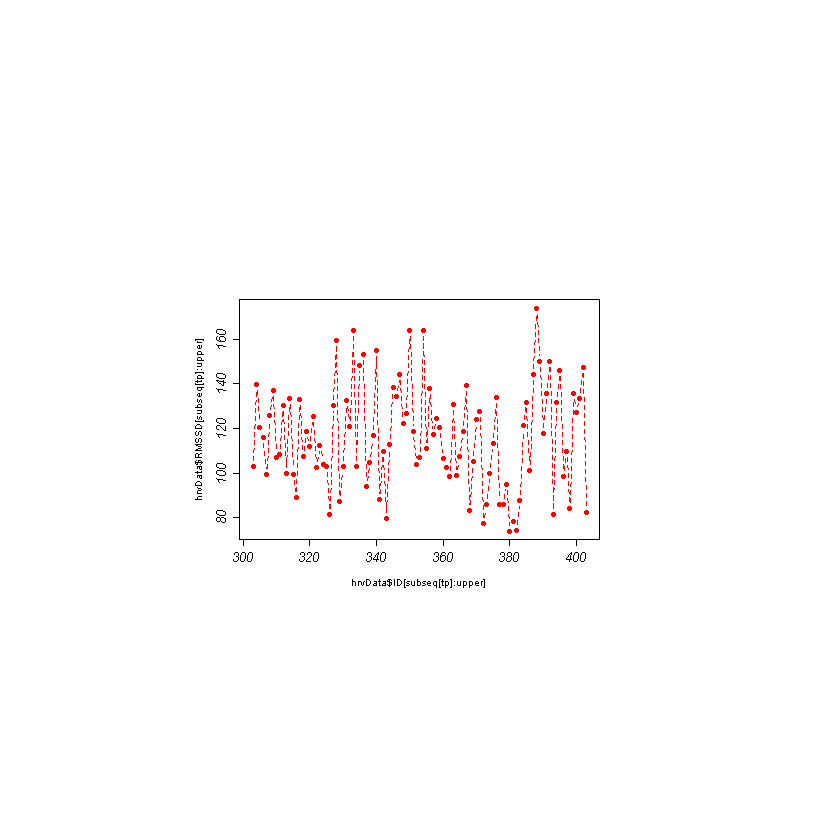

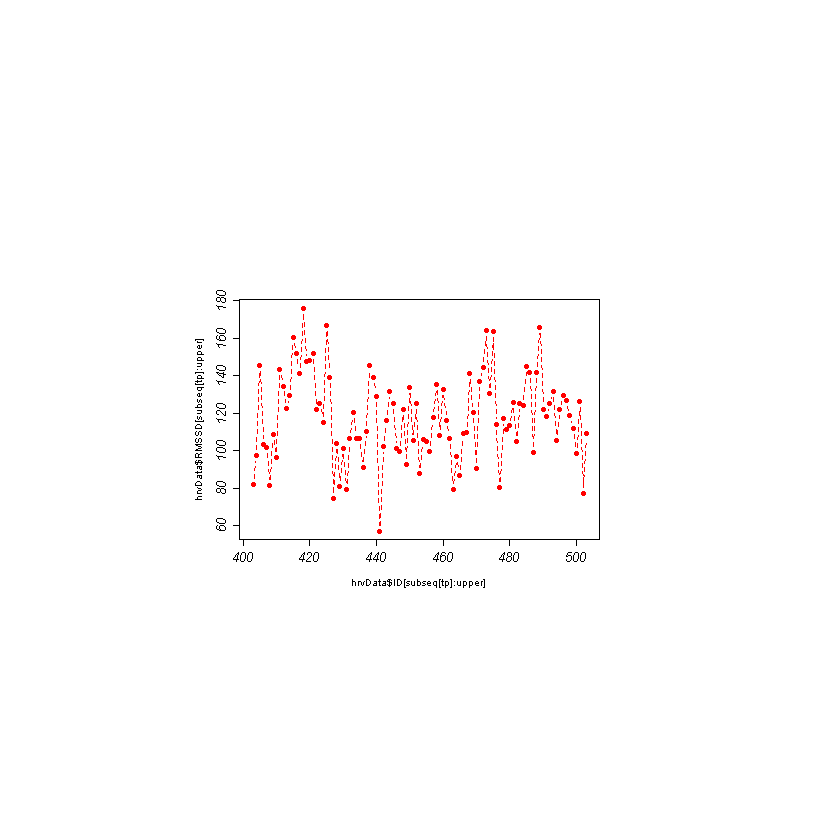

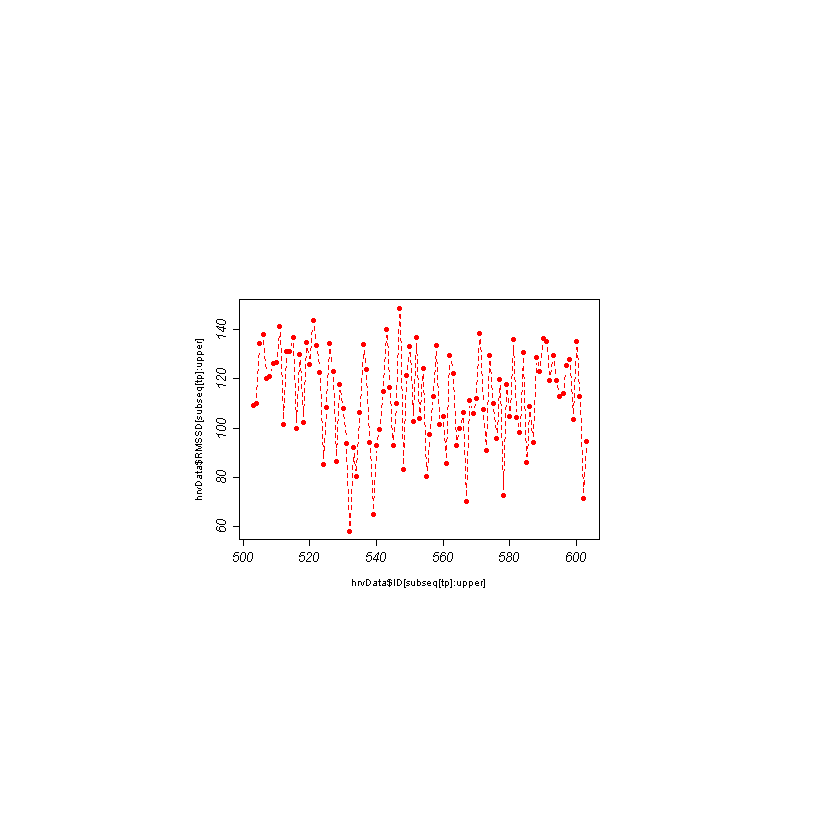

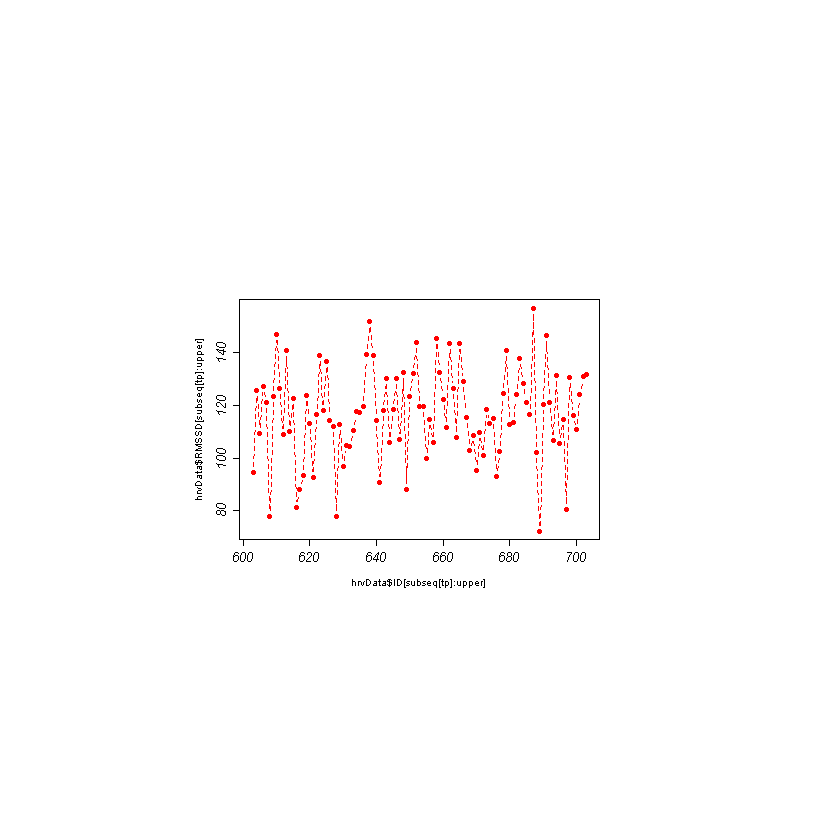

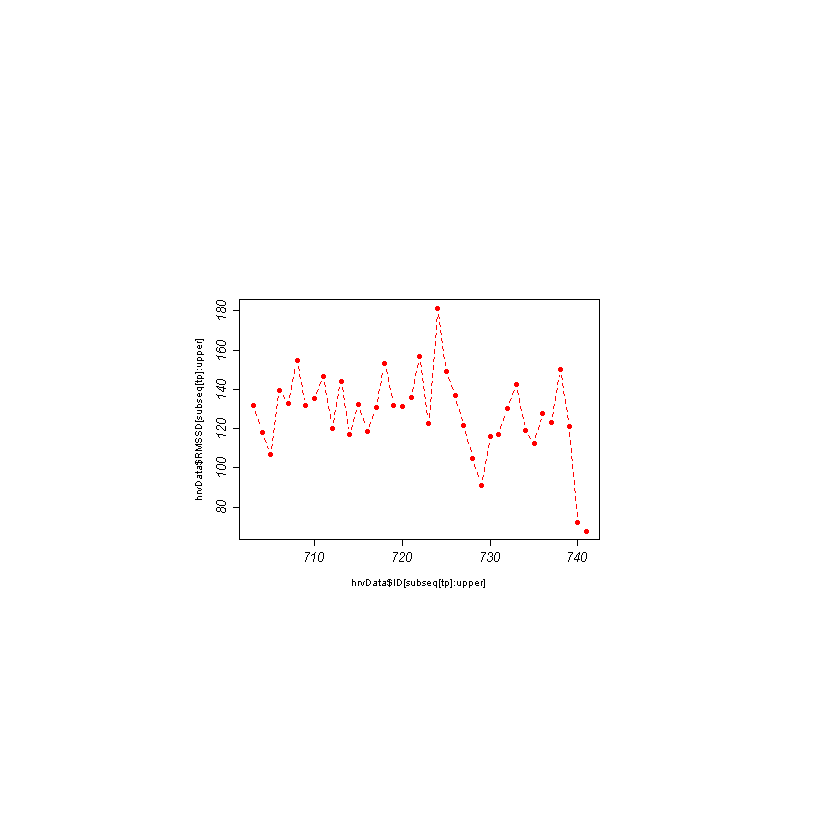

In [39]:
opar <- par(no.readonly=TRUE)
#par(mfrow=(c(2,1)),pin=c(1,1))
#par(pin=c(6.5,5))
par(lwd=1, cex=0.5)
par(cex.axis=1.25, font.axis=3)
for (tp in 1:parts){
    par(pin=c(3,2))
    if (tp < parts){
        upper <- subseq[tp+1]
    }
    else {
        upper <- dim(hrvData)[1]
    }
    plot(hrvData$ID[subseq[tp]:upper],hrvData$RMSSD[subseq[tp]:upper],type="b",pch=19, lty=2, col="red")
}
#plot(hrvData$ID[1:100],hrvData$RMSSD[1:100],type="b",pch=19, lty=2, col="red")

In [40]:
rownames(hrvData) <- NULL
rownames(hrvData) <- hrvData$ID

## Exercises
[Exercise on Dataframes in R](../../Assignments/Ass06DataframeAccessR.ipynb)